In [1]:
!pip install google-cloud-bigquery==1.21.0

In [4]:
from google.colab import files

uploaded = files.upload()

Saving BigQ-ML-ac192f74cdc3.json to BigQ-ML-ac192f74cdc3.json


In [2]:
'Setting the environment variable'

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]=r"BigQ-ML-ac192f74cdc3.json"

In [3]:
import io
import os
import uuid

'Step one: Create our dataset'

from google.cloud import bigquery
client = bigquery.Client()
# We use a unique dataset ID for this example to avoid collisions with
# other invocations of this tutorial.  In practice, you could leverage
# a persistent dataset and not create/destroy it with each invocation.
dataset_id = "bqml_first".format(str(uuid.uuid4().hex))

In [ ]:

dataset = bigquery.Dataset(client.dataset(dataset_id))
dataset.location = 'US'
client.create_dataset(dataset)

In [6]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [1]:
!pip install google-cloud-bigquery-storage

In [17]:
'Step two: Create your model'

'''Next, we create a linear regression model using the natality sample table for BigQuery. 
   The following standard SQL query is used to create the model we'll use to predict the birth weight of a child.'''

%%bigquery
CREATE MODEL `bqml_first.natality_model`
OPTIONS
  (model_type='linear_reg',
    input_label_cols=['weight_pounds']) AS
SELECT
  weight_pounds,
  is_male,
  gestation_weeks,
  mother_age,
  CAST(mother_race AS string) AS mother_race
FROM
  `bigquery-public-data.samples.natality`
WHERE
  weight_pounds IS NOT NULL
  AND RAND() < 0.001

""


In [7]:
'Step three: Evaluate your model'

%%bigquery
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_first.natality_model`,
    (
    SELECT
      weight_pounds,
      is_male,
      gestation_weeks,
      mother_age,
      CAST(mother_race AS STRING) AS mother_race
    FROM
      `bigquery-public-data.samples.natality`
    WHERE
      weight_pounds IS NOT NULL))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,3.29946,107188.69579,0.038055,0.739226,-60993.03881,-60989.917995


In [9]:
%%bigquery
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_first.natality_model`)

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,0.955255,1.679928,0.034236,0.739666,0.046098,0.046365


In [10]:
'Step four:Run the ML.EVALUATE query to evaluate the model'

%%bigquery
SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_first.natality_model`,
    (
    SELECT
      weight_pounds,
      is_male,
      gestation_weeks,
      mother_age,
      CAST(mother_race AS STRING) AS mother_race
    FROM
      `bigquery-public-data.samples.natality`
    WHERE
      weight_pounds IS NOT NULL))

,mean_absolute_error,mean_squared_error,mean_squared_log_error,median_absolute_error,r2_score,explained_variance
0,3.29946,107188.69579,0.038055,0.739226,-60993.03881,-60989.917995


In [12]:
'Step five: Use your model to predict outcomes'

%%bigquery
SELECT
  predicted_weight_pounds
FROM
  ML.PREDICT(MODEL `bqml_first.natality_model`,
    (
    SELECT
      is_male,
      gestation_weeks,
      mother_age,
      CAST(mother_race AS STRING) AS mother_race
    FROM
      `bigquery-public-data.samples.natality`
    WHERE
      state = "WY"))

,predicted_weight_pounds
0,7.713759
1,7.411772
2,7.352760
3,7.721601
4,7.821883
...,...
218730,7.211209
218731,7.211209
218732,7.211209
218733,7.211209


In [13]:
from google.colab import files

uploaded = files.upload()

Saving Training loss.JPG to Training loss.JPG


In [14]:
from google.colab import files

uploaded = files.upload()

Saving Evaluate model.JPG to Evaluate model.JPG


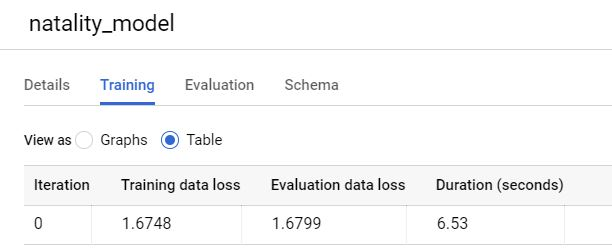

In [16]:
from IPython.display import Image, display
display(Image('Training loss.JPG'))

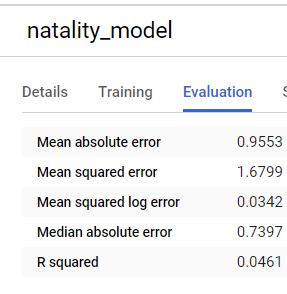

In [17]:
display(Image('Evaluate model.JPG'))